# Ajustando o caminho do Python

In [1]:
import os 
import sys
dir_path = os.getcwd()
dir_list = dir_path.split(os.path.sep)
dir_list = [os.path.sep] + dir_list[:dir_list.index("eidoloom")] + ["eidoloom", "src", "eidoloom"]
dir_list = os.path.join(*dir_list)
sys.path.append(dir_list)
print(dir_list)

/home/carlo/Documentos/dev/eidoloom/src/eidoloom


# Carregando o Generic Visitor

O generic visitor atravessa a árvore sintática ast para cada código nos diretórios.

In [2]:
import pytagger
gv = pytagger.GenV()
gv.visit_corpus()


/home/carlo/Documentos/dev/eidoloom/src/EidoloomCorpora


# Computa a janela de padrões para cada arquivo código

A coleção CODES contém todas as classes instanciadas durante a visita do corpus.

In [3]:
codes = pytagger.Code.CODES
pytagger.Code.PATTERNS = {}
nomes = [code.compute_patterns() or key[:4].lower() for key, code in codes.items()]
print(nomes)
print(pytagger.Code.PATTERNS)

['cand', 'conw', 'gues', 'advi', 'snak', 'krit', 'orde', 'pong', 'hang', 'rest', 'tict', 'joke', 'nume', 'drag']
{'▲◡◡': [1.1049723756906078, 1.5337423312883436, 1.4357501794687724, 1.218026796589525, 1.2468827930174564, 1.0443864229765014, 1.1544677903486493, 0.933852140077821, 0.8857395925597874, 0.7420756917205555, 0.7720517274657402, 0.8509029025243453, 0.9216589861751152, 0.9973705685012241], '◡◡◡': [1.1049723756906078, 2.3006134969325154, 2.1536252692031588, 2.43605359317905, 4.57190357439734, 3.91644908616188, 4.156084045255137, 3.735408560311284, 3.5429583702391496, 2.7562811406763488, 2.5091681142636557, 2.6472534745201854, 2.5806451612903225, 2.720101550457884], '◡◡◪': [1.1049723756906078, 0.7668711656441718, 0.7178750897343862, 0.6090133982947625, 0.41562759767248547, 0.26109660574412535, 0.4617871161394597, 0.311284046692607, 0.29524653085326247, 0.3180324393088095, 0.2895193977996526, 0.2836343008414484, 0.2764976958525346, 0.27201015504578835], '◡◪◉': [1.1049723756906078,

# Inserindo script de leitura, visualização para gerar o dataframe

Define o dataframe com exios rotulados (linhas e colunas), além disso o script determina o alinhamento dos rótulos com as operações para a plotagem.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
MIN = 7
patterns = {key: values for key, values in pytagger.Code.PATTERNS.items() if min(values)>MIN}
data_pid =  {key: (pid, values) for pid, (key, values) in enumerate(patterns.items()) if len(values) == len(nomes)}
#data = {"p{:02}".format(pid): [10*v/max(values) for v in values] for key, (pid,values) in data_pid.items() if min(values)>MIN}
data = {key: [10*v/max(values) for v in values] for key, (pid,values) in data_pid.items() if min(values)>MIN}
# Normalize pattern data
pattern_name_data = [(name, data) for name, data in data.items()]
pattern_name = [name for name, data in pattern_name_data]
cod_data = [[float(code) for code in line] for name, line in pattern_name_data if name != "kind"]
normalized_pattern_data = zip(*[[float(v)/float(sum(values)) for v in values] for values in zip(*cod_data)])
data = {pat: data for pat, data in zip(pattern_name,normalized_pattern_data)}
#normalized_pattern_dict = list(zip(pattern_name,normalized_pattern_data))
data['kind']=[codes[nome[:4]].kind for nome in nomes]
#data = [[name]+ code_data for name, code_data in zip(code_name, normalized_pattern_data)]
df = pd.DataFrame(data, index=nomes)
df

◭▲◬       ▲▣●       ▣●▲       ●▲◬       ▲◬◳       ◉●◭       ●◭▲  \
cand  0.035967  0.060831  0.060831  0.047109  0.060831  0.046121  0.060831   
conw  0.029542  0.057580  0.058366  0.050018  0.055981  0.049977  0.050649   
gues  0.027277  0.059074  0.060110  0.052283  0.051689  0.046146  0.046767   
advi  0.024794  0.056706  0.056180  0.060521  0.045865  0.045983  0.045865   
snak  0.026037  0.050208  0.044247  0.051670  0.054002  0.053117  0.051083   
krit  0.052508  0.047819  0.033557  0.044438  0.043834  0.067018  0.059773   
orde  0.052142  0.047431  0.032788  0.045738  0.042475  0.062457  0.060173   
pong  0.065550  0.045848  0.031497  0.041219  0.031370  0.068526  0.066359   
hang  0.062428  0.045510  0.030180  0.043099  0.030719  0.065874  0.064852   
rest  0.075414  0.043411  0.030464  0.046266  0.034819  0.075303  0.068282   
tict  0.067726  0.042217  0.030870  0.050200  0.045118  0.068416  0.062843   
joke  0.066484  0.042076  0.030637  0.051239  0.045477  0.067161  0.061690   
nume  0.063648  0.043007  0.032199  0.051868  0.043537  0.064296  0.059058   
drag  0.062696  0.043279  0.032451  0.053390  0.042612  0.064156  0.059286   

           ▲◬◬       ◬◬▲       ◬▲◬  ...       ◉▲▣       ■▲◬       ▲◬■  \
cand  0.060831  0.060831  0.060831  ...  0.046480  0.050567  0.052590   
conw  0.047901  0.045318  0.055709  ...  0.046312  0.061456  0.061456   
gues  0.044229  0.041844  0.054653  ...  0.052265  0.056746  0.056746   
advi  0.040541  0.035441  0.053098  ...  0.055000  0.048063  0.048063   
snak  0.038442  0.027001  0.042892  ...  0.061043  0.060825  0.051594   
krit  0.052723  0.026898  0.040987  ...  0.066025  0.057418  0.046700   
orde  0.052277  0.027432  0.040164  ...  0.067757  0.061202  0.051002   
pong  0.058062  0.024131  0.037821  ...  0.061331  0.058841  0.063512   
hang  0.055732  0.023324  0.038823  ...  0.062593  0.055991  0.061640   
rest  0.068122  0.024871  0.037357  ...  0.062267  0.044507  0.049693   
tict  0.061479  0.022760  0.040119  ...  0.060654  0.043221  0.045816   
joke  0.060351  0.022541  0.040029  ...  0.062086  0.042428  0.045584   
nume  0.058150  0.021579  0.040299  ...  0.063335  0.043975  0.046839   
drag  0.057279  0.021121  0.039685  ...  0.063420  0.043041  0.045844   

           ◬■◳       ▣▲◬       ▲◬▲       ▲◬◉       ◎▲◬       ◉●▲  \
cand  0.060831  0.048694  0.038501  0.031522  0.042450  0.027592   
conw  0.057885  0.061456  0.052191  0.039293  0.050599  0.026601   
gues  0.053448  0.056746  0.056499  0.047618  0.054965  0.033494   
advi  0.045270  0.048063  0.060521  0.053777  0.060521  0.060521   
snak  0.056713  0.050472  0.051238  0.053783  0.060295  0.055610   
krit  0.045542  0.044658  0.049097  0.063325  0.048942  0.045188   
orde  0.050566  0.041935  0.047195  0.062771  0.046437  0.044152   
pong  0.059293  0.038633  0.049280  0.065579  0.033678  0.035573   
hang  0.057213  0.038616  0.051079  0.068129  0.036840  0.040254   
rest  0.045995  0.041700  0.045488  0.065404  0.034333  0.034459   
tict  0.041435  0.038696  0.054120  0.065686  0.043629  0.041295   
joke  0.040675  0.037986  0.054195  0.064846  0.047685  0.044484   
nume  0.038940  0.039760  0.056228  0.067660  0.046919  0.046708   
drag  0.038112  0.038915  0.055784  0.067929  0.047991  0.050758   

               kind  
cand  intermediario  
conw  intermediario  
gues  intermediario  
advi  intermediario  
snak  intermediario  
krit    transitorio  
orde    transitorio  
pong    transitorio  
hang    transitorio  
rest    transitorio  
tict         basico  
joke         basico  
nume         basico  
drag         basico  

[14 rows x 21 columns]

# Gerando script gráfico em barras

O scritp gera o gráfico de barras empilhadas verticais para facilitar a compreensão e a análise de dados, possibilita redimensionar a area de plotagem.

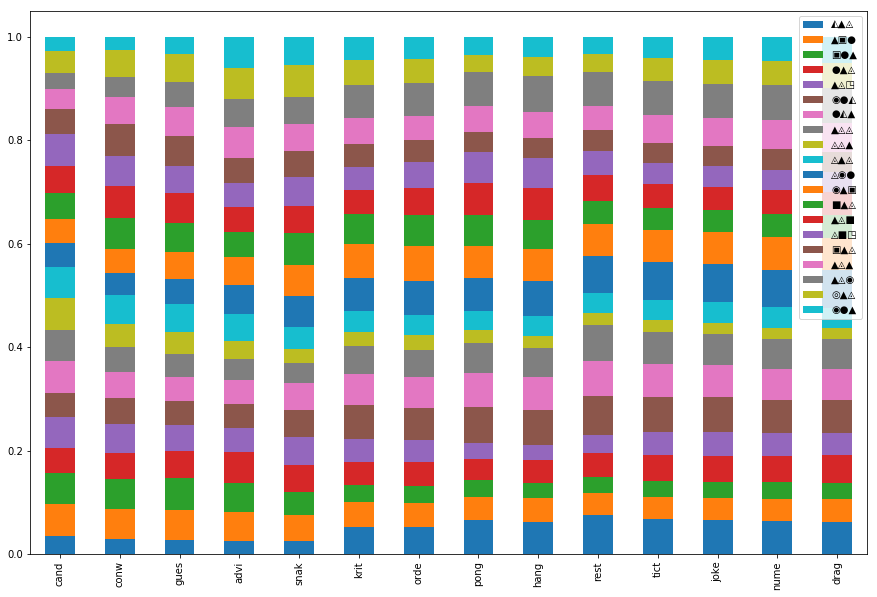

In [55]:
df.plot.bar(stacked=True, figsize=(15,10))

# Gerando script gráfico em linhas

O scritp gera o gráfico de linhas para exibir informações com pontos de dados chamados de marcadores ligados por segmentos de linha reta, possibilita redimensionar a area de plotagem.

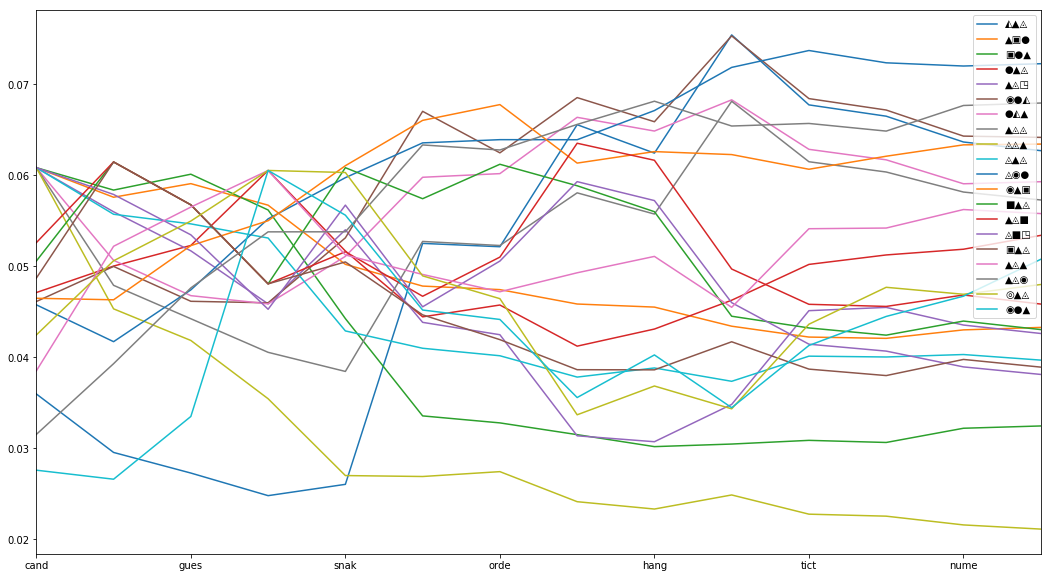

In [56]:
df.plot.line(figsize=(18,10))



# Gerando gráfico boxplot

O script gera o grafico boxplot para representar a variação de dados observados das variáveis, possibilita redimensionar a area de plotagem.

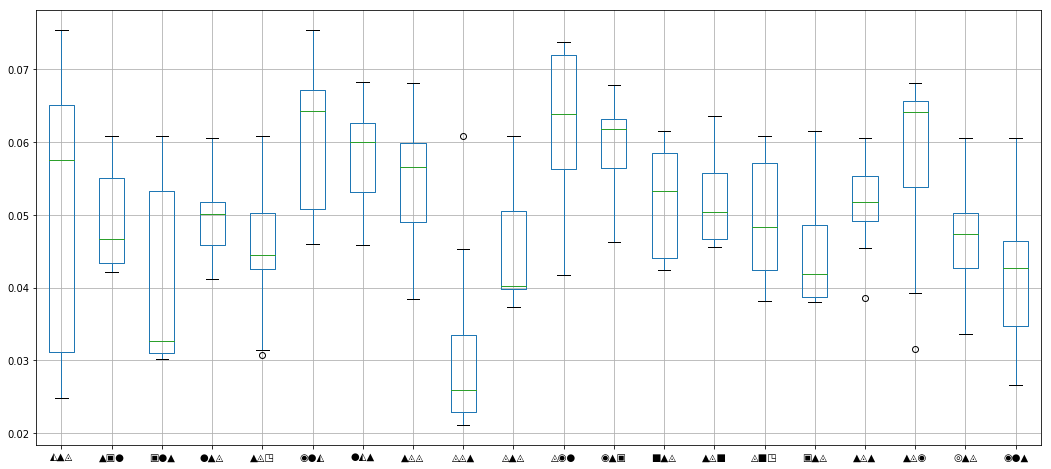

In [57]:
df.boxplot(figsize=(18,8))

# Gerando gráfico boxplot

O script gera o grafico boxplot para representar a variação de dados observados das variáveis, possibilita redimensionar a area de plotagem e visualização em cor.

basico
intermediario
transitorio


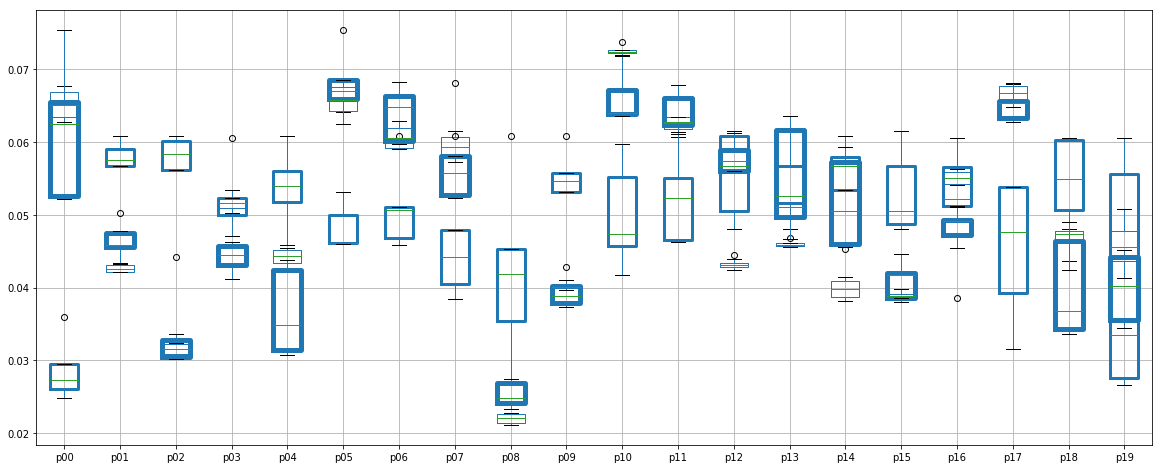

In [39]:
kinds = df.groupby(['kind'])
for tipo, (name, group) in enumerate(kinds):
    print(name)
    patch_artist=True
    #boxprops = dict(facecolor= c, color= c), capprops=dict(color=c), whiskerprops=dict(color=c), medianprops=dict(color=c)
    boxprops = dict(linestyle='-', linewidth=tipo*2+1, color='firebrick')
    flierprops = dict(marker='o', markerfacecolor='green', markersize=18,
                  linestyle='none')
    medianprops = dict(linestyle='-.', linewidth=4, color='firebrick')
    #props = dict(boxes="DarkBlue", whiskers="DarkBlue", medians="DarkBlue")

    plot = group.boxplot(figsize=(20,8), boxprops=boxprops)
    #https://matplotlib.org/3.1.1/gallery/statistics/bxp.html
    

# Gerando o gráfico de dispersão (scatterplot)

O script gera um gráfico de dispersão, utiliza coordenadas cartesianas para exibir valores com base no tipo do codigo - básico, intermediário e transitório.

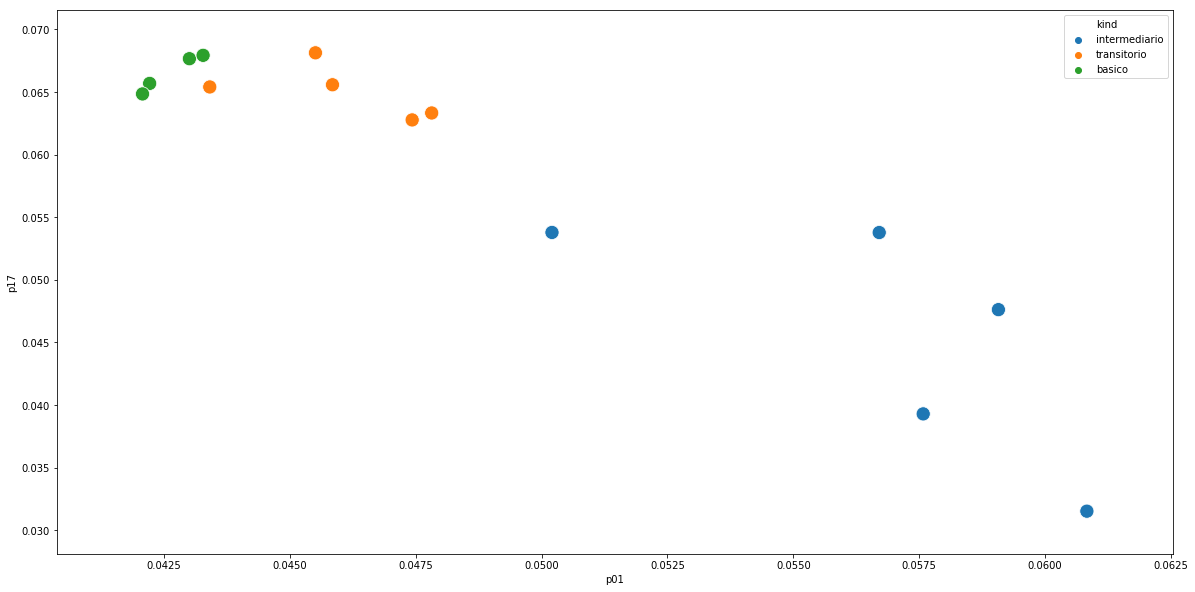

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="p01", y="p17", hue="kind", data=df, s=200)
#for line in range(0, df.shape[0]):
    #ax.text(df.p01[line]+0.2, df.p17[line], df.index[line][:4])

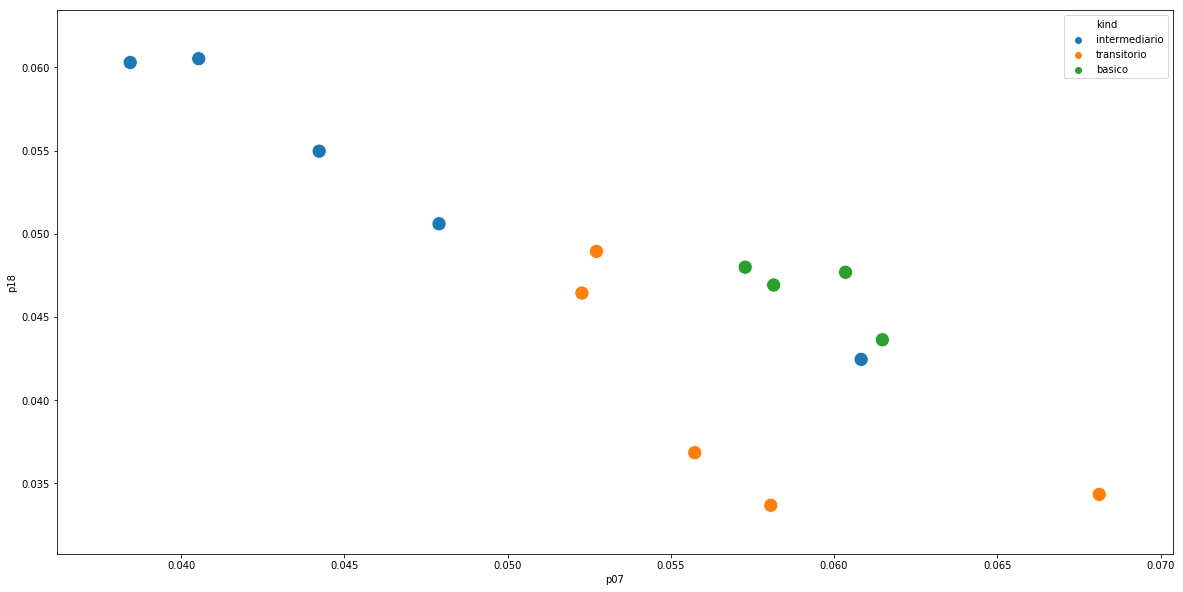

In [50]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="p07", y="p18", hue="kind", data=df, s=200)
#for line in range(0, df.shape[0]):
    #ax.text(df.p07[line]+0.2, df.p18[line], df.index[line][:4])

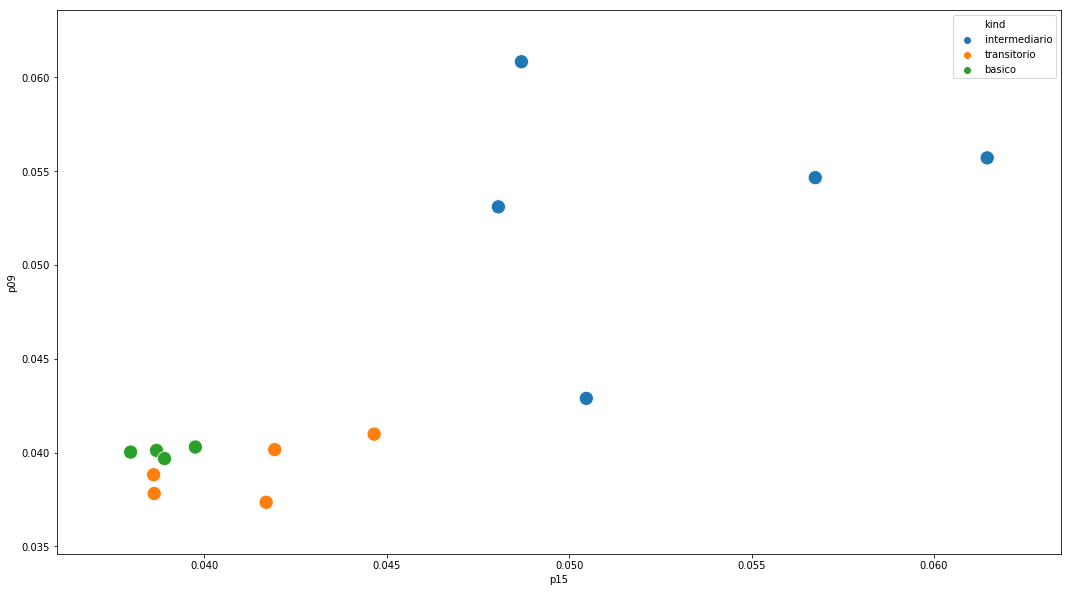

In [51]:
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x="p15", y="p09", hue="kind", data=df, s=200) #,  figsize=(16,8))
#for line in range(0, df.shape[0]):
    #ax.text(df.p15[line]+0.2, df.p09[line], df.index[line][:4])

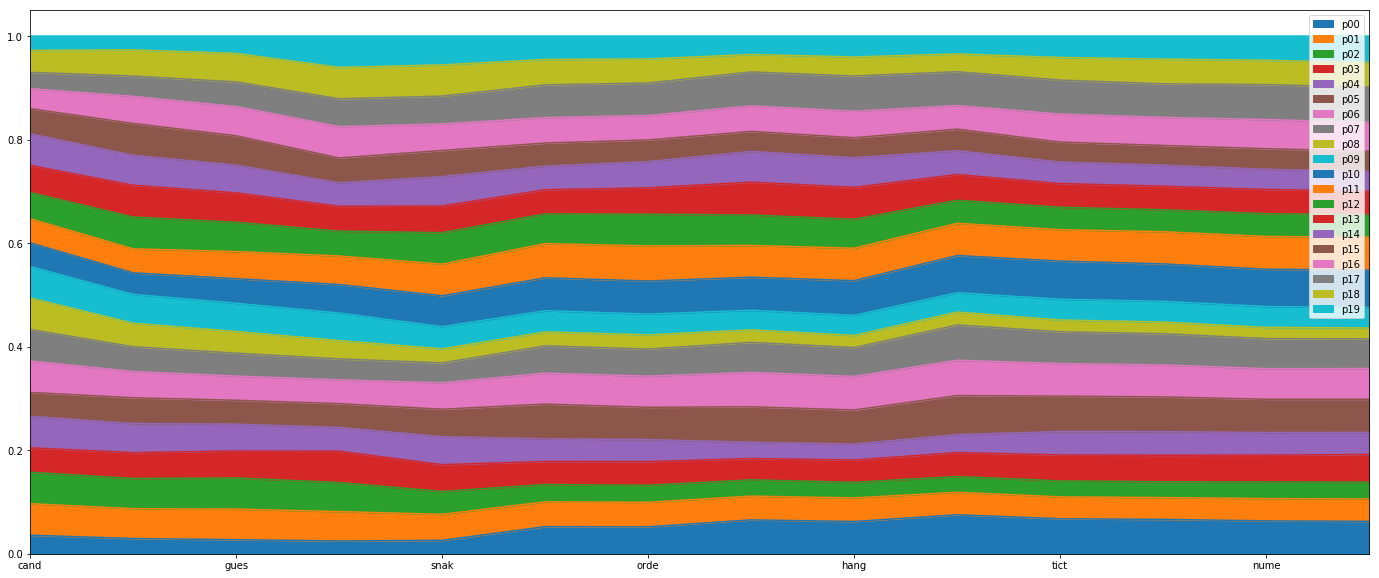

In [48]:
df.plot.area(stacked=True, figsize=(24,10))